<a href="https://colab.research.google.com/github/Kid-ML/MNIST/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train /= 255
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=((28, 28, 1)))) 
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(x_train, y_train, batch_size=38, epochs=12, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 37s 761us/sample - loss: 0.1967 - acc: 0.9410 - val_loss: 0.0592 - val_acc: 0.9831
Epoch 2/12
48000/48000 [==============================] - 37s 761us/sample - loss: 0.0560 - acc: 0.9821 - val_loss: 0.0475 - val_acc: 0.9851
Epoch 3/12
48000/48000 [==============================] - 36s 759us/sample - loss: 0.0399 - acc: 0.9872 - val_loss: 0.0420 - val_acc: 0.9887
Epoch 4/12
48000/48000 [==============================] - 36s 756us/sample - loss: 0.0318 - acc: 0.9900 - val_loss: 0.0443 - val_acc: 0.9872
Epoch 5/12
48000/48000 [==============================] - 36s 757us/sample - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0551 - val_acc: 0.9854
Epoch 6/12
48000/48000 [==============================] - 37s 765us/sample - loss: 0.0214 - acc: 0.9929 - val_loss: 0.0404 - val_acc: 0.9893
Epoch 7/12
48000/48000 [==============================] - 36s 752us/sample - loss: 0.0164 - acc: 0.9947 

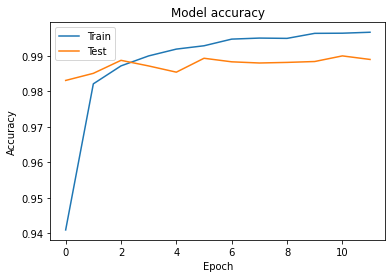

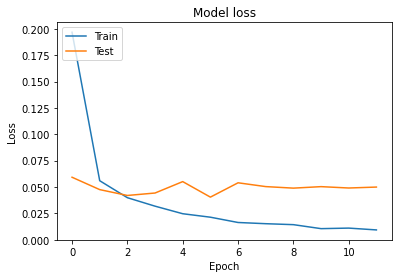

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()